In [3]:
import elasticc_for_etienne as efe
import matplotlib.pyplot as plt
import pickle

import numpy as np
import sncosmo
from astropy.table import Table

from iminuit import Minuit
from iminuit.cost import LeastSquares

import pandas as pd
import os 

In [4]:
with open('preprocess_data/ELASTICC_TRAIN_SNIa-SALT2.pkl', 'rb') as handle:
    lcs = pickle.load(handle)

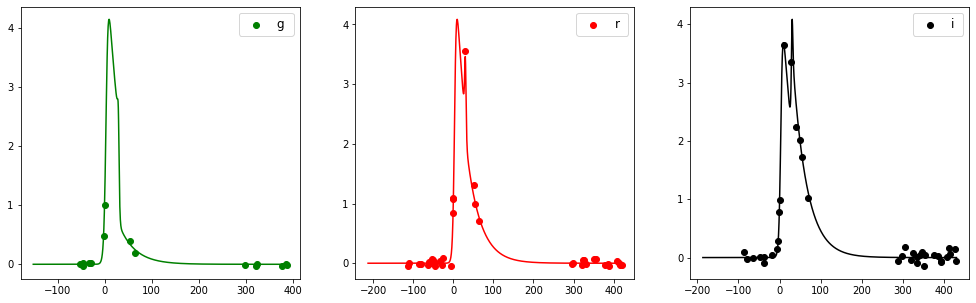

'\n\n# If you want to visualise one\nidx = 1108\nobj=lcs[idx]\nparam = efe.perform_fit(obj)[0]\nefe.plot_gri(obj, param)\nparam\n\n'

In [5]:
# If you need to randomly select objects

rng = np.random.default_rng()

for idx in rng.choice(list(range(0, len(lcs))), 1, replace=False):
    obj=lcs[idx]
    extraction = efe.perform_fit(obj)
    param = extraction[0]
    
    extra = extraction[1]
    efe.plot_gri(obj, param)
    
"""

# If you want to visualise one
idx = 1108
obj=lcs[idx]
param = efe.perform_fit(obj)[0]
efe.plot_gri(obj, param)
param

"""

In [5]:
efe.Fnu(np.array([[1,2],[3,4]]), 1, 1, 1, 1, 1, 1, 1, 1)

array([6.56303485e-18, 2.15032056e-18])

# ------------------------------------------------------------
# Merge a divided feature extraction 

In [2]:
name = 'ELASTICC_TRAIN_uLens-Binary'
main_file = 'bazin_features'


path = f'{main_file}/sub_features/{name}/'

all_filenames = np.sort(np.array(os.listdir(path)))

isfeatures =[".parquet" in f for f in all_filenames]
features = pd.concat([pd.read_parquet(path+ f) for f in all_filenames[isfeatures]],ignore_index=True)

In [3]:
features.to_parquet(f'{main_file}/{name}_features.parquet')

In [4]:
features

,a_g,t0_g,tfall_g,trise_g,error_g,a_r,t0_r,tfall_r,trise_r,error_r,a_i,t0_i,tfall_i,trise_i,error_i,max_flux,max_time,true_peak
0,2.103688,-4.642243,23.314278,-14.042630,329.939448,4.169605,-18.095236,33.460947,-17.327441,5693.541804,8.501729,-10.567755,23.637068,-14.114013,5778.936696,1070.163086,60849.0545,60938.207031
1,0.994182,-11.516605,399.761353,-0.627838,328.109175,8.858217,-59.738677,56.656311,-1.547457,17033.708446,40.000000,-159.886957,74.462176,-19.089451,13179.172826,410.959778,61057.2551,61110.890625
2,2.238131,54.706350,25.478372,-18.108726,65.831088,12.048984,68.069567,5.268132,-4.692127,3990.046497,20.686147,70.732421,7.808671,-6.688217,4587.474442,108.615730,60502.2100,60513.628906
3,1.078015,-3.657807,47.851125,-0.393466,132.921935,2.409786,-13.779376,90.509638,-8.003667,6534.028550,6.482198,70.721145,2.339365,-2.236554,1807.476045,178.398148,61082.1508,61083.847656
4,1.519341,-2.198506,27.790820,-2.423661,23.022585,14.232186,55.612906,12.327081,-9.374591,468.184654,39.152921,35.365259,22.235932,-11.900042,209.169259,39.622395,60443.3339,60451.648438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,1.003130,0.347757,0.478736,-4.864300,3001.822552,10.825075,0.413792,0.778005,-0.742142,77724.589403,11.536571,-13.012260,1.410683,-29.999336,193320.736566,68.566193,60295.2921,60299.640625
3328,6.720877,-19.137651,10.061169,-3.268289,3.230354,8.697567,14.235018,1.710703,-1.665069,30.382999,26.762697,0.899561,0.741929,-0.729400,489.111537,74.352997,60803.3437,60803.601562
3329,1.469369,-3.362689,28.519769,-2.840477,16.991563,5.564873,-19.367138,32.431806,-0.162059,78.081434,9.251177,-15.660110,30.652905,-0.038243,70.069264,35.037086,61113.2582,61091.136719
3330,2.440080,12.152696,500.000000,-30.000000,7419.731881,6.482633,15.238242,500.000000,-30.000000,66942.323770,10.293394,56.759826,500.000000,-30.000000,104516.706869,-310.795471,60350.1296,60204.707031


In [10]:
from os.path import exists

In [12]:
exists('nohup')

True